In [72]:
!pip install keras

In [73]:
!pip install tensorflow

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv('/content/archive (9).zip')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.shape

(10000, 14)

In [77]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [78]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [79]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Dropping Unncessary Columns

In [80]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [81]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

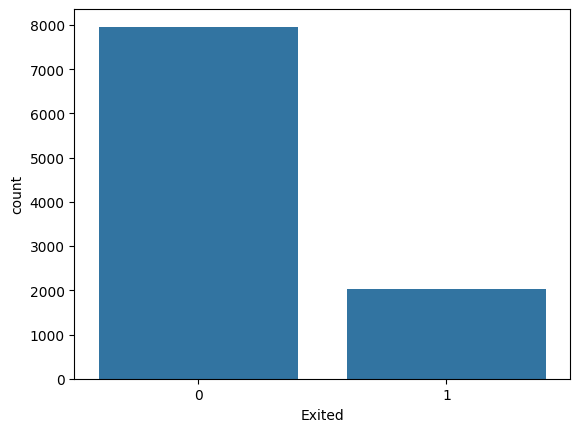

In [82]:
sns.countplot(x=df['Exited'],data=df)

<Axes: xlabel='count', ylabel='Geography'>

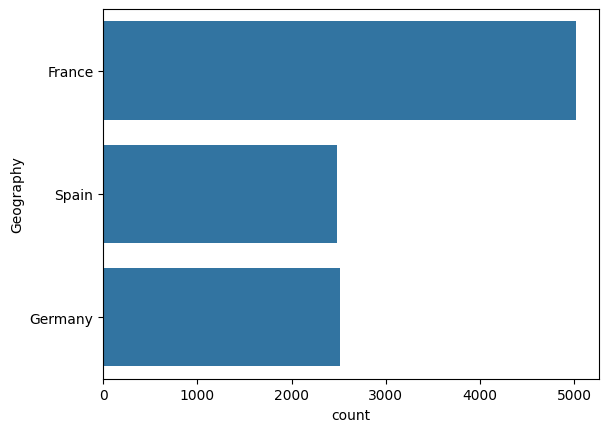

In [83]:
sns.countplot(df['Geography'])

<Axes: xlabel='count', ylabel='Gender'>

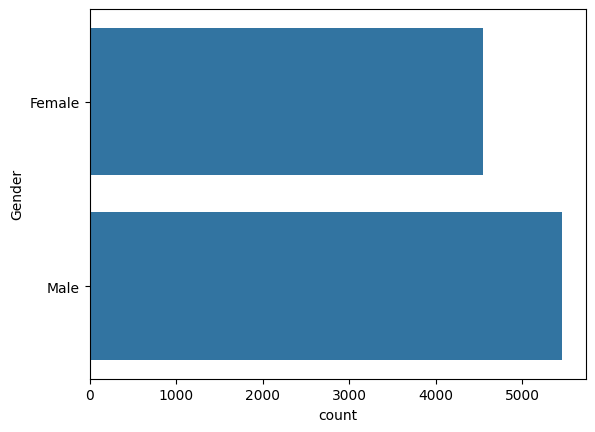

In [84]:
sns.countplot(df['Gender'])

In [85]:
df=pd.get_dummies(df,drop_first=True)

<Axes: >

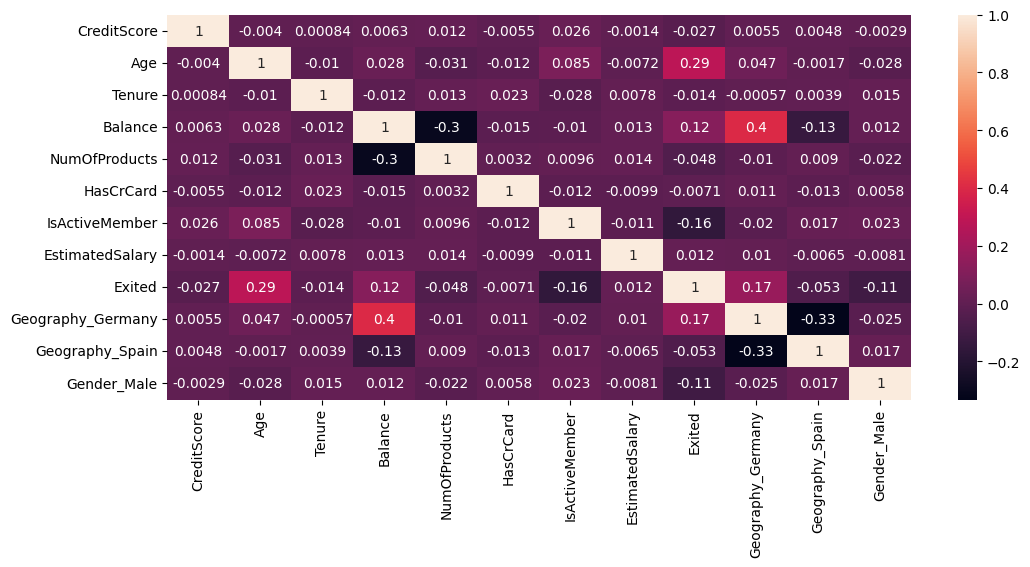

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

Spliting the data X and Y

In [87]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [88]:
x.shape

(10000, 11)

In [89]:
y.shape

(10000,)

In [90]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [91]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [92]:
x_train.shape

(8000, 11)

In [93]:
type(x_train)

pandas.core.frame.DataFrame

In [94]:
x_test.shape

(2000, 11)

In [95]:
y_train.shape

(8000,)

In [96]:
y_test.shape

(2000,)

In [97]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)

In [98]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [99]:
print(x_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


Create Artificial Neural Network

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [101]:
keras.__version__

'3.8.0'

In [102]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [103]:
#Initilizing the ANN
ann_clf=Sequential()

In [104]:
#Adding the input layer and hidden layer
ann_clf.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
#Adding the second hidden layer
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [106]:
#Adding the outlayer
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [107]:
#complying the ann
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model Summary

In [108]:
ann_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Model Training(Fittinng the ann to training set)

In [109]:
ann_clf.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7912 - loss: 0.6631 - val_accuracy: 0.7910 - val_loss: 0.4790
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7929 - loss: 0.4577 - val_accuracy: 0.7910 - val_loss: 0.4461
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7956 - loss: 0.4371 - val_accuracy: 0.7910 - val_loss: 0.4431
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7955 - loss: 0.4292 - val_accuracy: 0.7910 - val_loss: 0.4407
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7957 - loss: 0.4242 - val_accuracy: 0.7910 - val_loss: 0.4383
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7965 - loss: 0.4277 - val_accuracy: 0.7910 - val_loss: 0.4385
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8026 - loss: 0.4127 - val_accuracy: 0.7910 - val_loss: 0.4354
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7973 - loss: 0.4240 - val_a

In [110]:
y_pred =ann_clf.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [115]:
y_pred =(y_pred > 0.5)

In [116]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix , Accuracy Score & Classification Report

In [119]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[1541   66]
 [ 261  132]]
0.8365


In [120]:
cls_rpt=classification_report(y_test,y_pred)
print(cls_rpt)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1607
           1       0.67      0.34      0.45       393

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000

